<h1 style="font-size: 30px;">Data Analysis on Pulsar Stars</h1>

<h1 style="font-size: 25px;">Introduction</h1>

A pulsar is a neutron star that rotates with pulses at a regular interval of a millisecond or second. The rotation has two powerful magnetic poles that have a funnel jet of accelerated particles being released from each pole (Robert, 2023). This acceleration of particles produces a beam of light which is known as the pulse. The pulse from the pulsar makes it very useful for investigating the condition of space, calculating cosmic distance, and even testing the theory of general relativity (Robert, 2023). The use of classification will help us predict whether a star is a pulsar or not.

The radio emission from the pulsar can be detected on Earth, but the detection can also be caused by noise or radio interference. There were two types of information gained from the detected signal pattern that is significant in pulsar star research: integrated impulse profile and DM-SNR curve (Lyon, 2016). The integrated impulse profile refers to an array of continuous values describing the pulse intensity, and the DM-SNR curve shows the relationship between the dispersion measure (DM) and Signal-to-noise ratio (S/N) (Lyon, 2016). 

Our project utilises the Pulsar Star Dataset which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey. It includes the mean, skewness, kurtosis, and standard deviation of both the integrated impulse profile and DM-SNR curve. Thus, there are 8 variables in total that we can choose to be the predictor variables. 

We want to know if the information gained from the signals received on Earth can be used to predict whether the source of the signal is a pulsar or not. We will establish a model that will help us answer the question: can the variables of interest, such as integrated profile skewness and integrated profile mean, accurately predict whether the signal received comes from a pulsar?

<h1 style="font-size: 25px;">Method & Result</h1>

In [1]:
#please run this first 
import altair as alt
import numpy as np
import pandas as pd
import sklearn

from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import (
    GridSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

# this enables us to make graph using more than 5000 rows of data
alt.data_transformers.enable('default', max_rows=None) 

DataTransformerRegistry.enable('default')

In [2]:
import random
random.seed(1)

We set the seed value at the beginning to ensure the data analysis is reproducible, and then we load and clean our data as below. In the original data set, the source of the signal(column name is "class_star"), a categorical variable, is represented by 1 or 0, where 1 means from a pulsar, and 0 means not from a pulsar. We replaced 1 and 0 with their corresponding meaning to improve the readability of the data analysis. 

In [3]:
star_data=pd.read_csv("data/HTRU_2.arff", skiprows= 11, 
                      names= [
                          "Profile_mean_numeric",
                          "Profile_stdev_numeric",
                          "Profile_skewness_numeric",
                          "Profile_kurtosis_numeric",
                          "DM_mean_numeric",
                          "DM_stdev_numeric",
                          "DM_skewness_numeric",
                          "DM_kurtosis_numeric",
                          "class_star",
                      ]
                     )


star_data["class_star"] = star_data["class_star"].apply(
lambda x: "pulsar" if (x == 1) else "not_pulsar"
)
print("Table 1: Data")
star_data

Table 1: Data


Profile_mean_numeric  Profile_stdev_numeric  Profile_skewness_numeric  \
0                140.562500              55.683782                 -0.234571   
1                102.507812              58.882430                  0.465318   
2                103.015625              39.341649                  0.323328   
3                136.750000              57.178449                 -0.068415   
4                 88.726562              40.672225                  0.600866   
...                     ...                    ...                       ...   
17893            136.429688              59.847421                 -0.187846   
17894            122.554688              49.485605                  0.127978   
17895            119.335938              59.935939                  0.159363   
17896            114.507812              53.902400                  0.201161   
17897             57.062500              85.797340                  1.406391   

       Profile_kurtosis_numeric  DM_mean_numeric  DM_stdev_numeric  \
0                     -0.699648         3.199833         19.110426   
1                     -0.515088         1.677258         14.860146   
2                      1.051164         3.121237         21.744669   
3                     -0.636238         3.642977         20.959280   
4                      1.123492         1.178930         11.468720   
...                         ...              ...               ...   
17893                 -0.738123         1.296823         12.166062   
17894                  0.323061        16.409699         44.626893   
17895                 -0.743025        21.430602         58.872000   
17896                 -0.024789         1.946488         13.381731   
17897                  0.089520       188.306020         64.712562   

       DM_skewness_numeric  DM_kurtosis_numeric  class_star  
0                 7.975532            74.242225  not_pulsar  
1                10.576487           127.393580  not_pulsar  
2                 7.735822            63.171909  not_pulsar  
3                 6.896499            53.593661  not_pulsar  
4                14.269573           252.567306  not_pulsar  
...                    ...                  ...         ...  
17893            15.450260           285.931022  not_pulsar  
17894             2.945244             8.297092  not_pulsar  
17895             2.499517             4.595173  not_pulsar  
17896            10.007967           134.238910  not_pulsar  
17897            -1.597527             1.429475  not_pulsar  

[17898 rows x 9 columns]

In [4]:
star_data_training, star_data_testing = train_test_split(star_data, test_size=0.25, random_state=1)

First, we will split the dataset into training and testing data. We will use 75% training data and 25% testing data.

In [5]:
print("Table 2: Data Information")
star_data_training.describe()

Table 2: Data Information


Profile_mean_numeric  Profile_stdev_numeric  Profile_skewness_numeric  \
count          13423.000000           13423.000000              13423.000000   
mean             111.127557              46.521920                  0.479358   
std               25.613245               6.850163                  1.068907   
min                5.812500              24.772042                 -1.876011   
25%              100.921875              42.397587                  0.027837   
50%              114.992188              46.941260                  0.224081   
75%              127.101562              51.037166                  0.476457   
max              192.617188              98.778911                  8.069522   

       Profile_kurtosis_numeric  DM_mean_numeric  DM_stdev_numeric  \
count              13423.000000     13423.000000      13423.000000   
mean                   1.793471        12.430856         26.349992   
std                    6.262977        29.053057         19.392942   
min                   -1.791886         0.213211          7.370432   
25%                   -0.188557         1.937291         14.476763   
50%                    0.196496         2.818562         18.515866   
75%                    0.928832         5.520067         28.589218   
max                   68.101622       223.392141        110.642211   

       DM_skewness_numeric  DM_kurtosis_numeric  
count         13423.000000         13423.000000  
mean              8.281254           104.161964  
std               4.485116           106.215166  
min              -3.139270            -1.976976  
25%               5.727669            34.218081  
50%               8.405033            82.446000  
75%              10.657851           138.087940  
max              34.539844          1191.000837

Then we use ".describe()" to get some basic numerical information about the data, such as mean and median. We noticed that different variables have quite different scales.

In [9]:
two_class_dist=star_data_training["class_star"].value_counts()
two_class_dist

not_pulsar    12188
pulsar         1235
Name: class_star, dtype: int64

Using ".value_counts()", we know there are 12188 observations from non-pulsar and 1235 observations from pulsars. 

In [6]:
star_data_plot_1 =(
    alt.Chart(star_data_training, title= "Histogram of Variables")
    .mark_bar(opacity=0.5)
    .encode(
    alt.X(alt.repeat("repeat"), type='quantitative',bin = alt.BinParams(maxbins = 20)),
    alt.Y("count()"),
    color=alt.Color("class_star",title= "Where the signal comes from")
).properties(
    width=250,
    height=250
).repeat(
    repeat=[
        "Profile_mean_numeric",
        "Profile_stdev_numeric",
        "Profile_skewness_numeric",
        "Profile_kurtosis_numeric",
        "DM_mean_numeric",
        "DM_stdev_numeric",
        "DM_skewness_numeric",
        "DM_kurtosis_numeric",
    ],
    columns=2
    ).transform_fold(
        ["a","b","c","d","e","f"]
    )
)
print("Figure 1: Histogram of Variables (row 1 from left to right (a) (b); row 2 from left right (c) (d);row 3 from left to right (e) (f); row 4 from left right (g) (h);")
star_data_plot_1

Figure 1: Histogram of Variables (row 1 from left to right (a) (b); row 2 from left right (c) (d);row 3 from left to right (e) (f); row 4 from left right (g) (h);


/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

As part of the exploratory data analysis and selecting the predictors, we have graphed the distributions for all variables we have in the above histograms. We can see that integrated profile mean and integrated profile skewness have distributions that show an obvious distinction between the signal from pulsar and non-pulsar. They have fewer overlaps than other graphs. 

The distribution of the integrated profile skewness (figure 1 (c)) is different for signals coming from pulsar stars and those that do not. If the profile skewness is greater than 2, there is a high possibility that the detected signal is from a pulsar star.

We can also see that the integrated profile mean (figure 1 (a)) of the pulsar star and the integrated profile mean of the non-pulsar star also have obvious differences in distribution. If the profile mean is smaller than 50, there is a high possibility that the detected signal is from a pulsar star.

In [7]:
scatter_plot=(
    alt.Chart(star_data_training, title="Integrated Profile Skewness and Profile Mean")
    .mark_point(opacity=0.3)
    .encode(
        x=alt.X("Profile_skewness_numeric", title="Profile Skewness of the Signal"),
        y=alt.Y("Profile_mean_numeric", title= "Profile Mean of the Signal"),
        color=alt.Color("class_star", title= "Where the signal comes from")
    )
).configure_axis(titleFontSize=18, labelFontSize=20).properties(width=500, height=400)
print("Figure 2: Integrated Profile Skewness and Profile Mean")
scatter_plot

Figure 2: Integrated Profile Skewness and Profile Mean


alt.Chart(...)

When we use the profile mean and profile skewness to draw a scatter plot, we can see that signals from pulsar stars are distributed mostly at the lower right of the graph, which indicates that the signal with a lower profile mean and higher profile skewness is more likely to be the signal that comes from a pulsar.

Based on exploratory data analysis, we will use integrated profile mean and integrated profile skewness from a detected signal as our predictor variables, because the exploratory data analysis demonstrated that the signals from pulsars usually fall at a different area than others in the scatter plot of integrated profile mean versus integrated profile skewness. Other variables do not show a such distinct difference in distribution between signals from the pulsar star and those from other sources. 

Since our goal is to predict whether a candidate is a pulsar star or not, we are going to build a model utilising scikit-learn in Python to perform the K-nearest neighbour classification algorithm. In order to achieve a good performance of our model, we are going to optimize the parameter for the K-nearest neighbour classification algorithm first. Then, we will build the model based on the best K, train our model, and use the model to perform classification. 

In [8]:
preprocessor_pulsar = make_column_transformer(
    (StandardScaler(), ["Profile_mean_numeric", "Profile_skewness_numeric"])
)
preprocessor_pulsar

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Profile_mean_numeric',
                                  'Profile_skewness_numeric'])])

After looking at the data, we found different variables are in different scales. Since the K-nearest neighbours algorithm requires the distances between observations, it will be affected by the scale of the data. We then created a data preprocessor in order to standardise predictor variables so that we make our variables to be in comparable scale. 

In [9]:
knn=KNeighborsClassifier()
pipe_pulsar = make_pipeline(preprocessor_pulsar, knn)
pipe_pulsar

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Profile_mean_numeric',
                                                   'Profile_skewness_numeric'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

We then create a pipeline so that we can chain together multiple steps in order to streamline the process. This saves time by eliminating the need for additional intermediate steps by putting all the data through the same process. We place all the data analysis steps that we established previously such as the KNeighborsClassifier (without specifying how many neighbours to use) and the preprocessor into our pipeline. 

In [10]:
param_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 101, 1)
}
X_train = star_data_training[["Profile_mean_numeric", "Profile_skewness_numeric"]]
y_train = star_data_training ["class_star"]
X_test = star_data_testing[["Profile_mean_numeric", "Profile_skewness_numeric"]]
y_test =star_data_testing ["class_star"]

Using “param_grid”, we set up the parameter values that GridSearchCV will try in the next cell. Here, we want it to try values from 1 to 100. We then split the predictors and the label we want to predict for the training set and testing set by assigning “X_train”, “y_train”, “X_test”, “y_test”. 

In [11]:
pulsar_tune=GridSearchCV(
    pipe_pulsar,
    param_grid,
    cv = 5,
    n_jobs=-1,
)
pulsar_fit = pulsar_tune.fit(X_train, y_train)
pulsar_k_select=pd.DataFrame(pulsar_fit.cv_results_)
print("Table 3: K Selection")
pulsar_k_select

Table 3: K Selection


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.130683      0.064654         0.824715        0.314410   
1        0.024754      0.009046         0.213741        0.083647   
2        0.085878      0.032359         0.876934        0.199249   
3        0.037307      0.016064         0.325650        0.153152   
4        0.077613      0.051049         0.785731        0.300683   
..            ...           ...              ...             ...   
95       0.017849      0.001031         0.196586        0.001120   
96       0.017915      0.001573         0.211319        0.019703   
97       0.058932      0.035797         0.925905        0.287870   
98       0.038188      0.025128         0.360724        0.230415   
99       0.055553      0.045802         0.912055        0.529179   

   param_kneighborsclassifier__n_neighbors  \
0                                        1   
1                                        2   
2                                        3   
3                                        4   
4                                        5   
..                                     ...   
95                                      96   
96                                      97   
97                                      98   
98                                      99   
99                                     100   

                                        params  split0_test_score  \
0     {'kneighborsclassifier__n_neighbors': 1}           0.962011   
1     {'kneighborsclassifier__n_neighbors': 2}           0.970577   
2     {'kneighborsclassifier__n_neighbors': 3}           0.972439   
3     {'kneighborsclassifier__n_neighbors': 4}           0.975791   
4     {'kneighborsclassifier__n_neighbors': 5}           0.973929   
..                                         ...                ...   
95   {'kneighborsclassifier__n_neighbors': 96}           0.978026   
96   {'kneighborsclassifier__n_neighbors': 97}           0.977654   
97   {'kneighborsclassifier__n_neighbors': 98}           0.977654   
98   {'kneighborsclassifier__n_neighbors': 99}           0.977281   
99  {'kneighborsclassifier__n_neighbors': 100}           0.977654   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.967970           0.963128           0.958271   
1            0.975791           0.971695           0.972057   
2            0.978399           0.975047           0.975037   
3            0.979143           0.974302           0.976155   
4            0.979888           0.977654           0.975037   
..                ...                ...                ...   
95           0.981006           0.975419           0.975782   
96           0.981378           0.975419           0.976155   
97           0.981006           0.975047           0.975782   
98           0.981006           0.975419           0.975782   
99           0.981006           0.975419           0.975410   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0            0.963115         0.962899        0.003099              100  
1            0.971684         0.972361        0.001786               99  
2            0.973547         0.974894        0.002008               98  
3            0.973920         0.975862        0.001847               97  
4            0.975410         0.976384        0.002130               96  
..                ...              ...             ...              ...  
95           0.977273         0.977501        0.001995               75  
96           0.977273         0.977576        0.002060               68  
97           0.977273         0.977352        0.002060               88  
98           0.977645         0.977427        0.001981               80  
99           0.977273         0.977352        0.002047               91  

[100 rows x 14 columns]

Using GridSearchCV, we perform a 5-fold cross-validation in order to calculate the accuracy of reasonable values of K that can be used for our KNearestNeighbors analysis. The above code creates a GridSearchCV object that we can then pass through our pipeline and the param_grid that we created earlier. 

We use ".fit"(which takes predictors and labels of the training set as arguments) to actually let the tuning process run. Using ".cv_results_", we get the result of the cross-validation, which shows the accuracy (appeared as "mean_test_score" in the table) for each K value we try. Then, we can plot a graph of accuracy versus the number of K to see which K gives us the highest accuracy.

In [12]:
pulsar_k_select_plot = (
    alt.Chart(pulsar_k_select, title="Parameter Selection")
    .mark_line(point= True)
    .encode(
        x=alt.X("param_kneighborsclassifier__n_neighbors", title ="Parameter K"),
        y=alt.Y("mean_test_score", title = "Accuracy", scale=alt.Scale(zero=False))
    )
).configure_axis(titleFontSize=18, labelFontSize=20).properties(width=500, height=400)

print("Figure 3: Parameter Selection")
pulsar_k_select_plot     

Figure 3: Parameter Selection


/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

We can see from the graph that the accuracy first increases as K increase, and then it stays relatively constant with small changes for a while. When K gets even larger, accuracy starts to slowly decrease. 

In [13]:
best_k= pulsar_k_select.sort_values("mean_test_score", ascending=False)
print("Table 4: Best K")
best_k.head()

Table 4: Best K


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
10       0.016983      0.000383         0.160185        0.003694   
18       0.019367      0.001360         0.183972        0.013703   
43       0.042135      0.023469         0.386336        0.195255   
29       0.017906      0.000925         0.179825        0.017183   
28       0.080414      0.015461         0.915531        0.447382   

   param_kneighborsclassifier__n_neighbors  \
10                                      11   
18                                      19   
43                                      44   
29                                      30   
28                                      29   

                                       params  split0_test_score  \
10  {'kneighborsclassifier__n_neighbors': 11}           0.975791   
18  {'kneighborsclassifier__n_neighbors': 19}           0.975791   
43  {'kneighborsclassifier__n_neighbors': 44}           0.976164   
29  {'kneighborsclassifier__n_neighbors': 30}           0.976164   
28  {'kneighborsclassifier__n_neighbors': 29}           0.975791   

    split1_test_score  split2_test_score  split3_test_score  \
10           0.982868           0.977654           0.978018   
18           0.982495           0.978399           0.976900   
43           0.982495           0.978399           0.976900   
29           0.982495           0.978399           0.976900   
28           0.982123           0.978771           0.976900   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
10           0.977645         0.978395        0.002368                1  
18           0.978018         0.978321        0.002278                2  
43           0.977645         0.978321        0.002216                3  
29           0.977645         0.978321        0.002216                3  
28           0.977645         0.978246        0.002168                5

We sort the accuracy of each K from highest to lowest. Since K=11 gives us the highest accuracy, we will use K=11 to build our K-nearest neighbors model. We will repeat the process of building our model, this time passing in the value 11 into KNeighborsClassifier.

In [14]:
knn_spec= KNeighborsClassifier(n_neighbors=11)
pipe_spec= make_pipeline(preprocessor_pulsar,knn_spec)
pipe_spec

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Profile_mean_numeric',
                                                   'Profile_skewness_numeric'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [15]:
pulsar_fit_2=pipe_spec.fit(X_train,y_train)
pulsar_fit_2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Profile_mean_numeric',
                                                   'Profile_skewness_numeric'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [16]:
prediction=pulsar_fit_2.predict(X_test)
result=star_data_testing.assign(prediction=prediction)
print("Table 5: Prediction Result")
result

Table 5: Prediction Result


Profile_mean_numeric  Profile_stdev_numeric  Profile_skewness_numeric  \
13381            106.562500              46.328270                  0.442697   
4382              62.351562              37.783634                  3.028611   
12059            107.382812              43.501818                  0.201462   
8470             118.421875              39.168428                  0.166347   
2874              91.898438              34.546129                  0.698335   
...                     ...                    ...                       ...   
16050            111.554688              50.889096                  0.493286   
6868             116.617188              52.477841                  0.034817   
15654            113.171875              50.398740                  0.220765   
9251             127.343750              51.457118                 -0.178079   
1622             101.031250              41.848487                  0.424008   

       Profile_kurtosis_numeric  DM_mean_numeric  DM_stdev_numeric  \
13381                 -0.129391        93.003344         93.027201   
4382                  12.851678        41.743311         70.712890   
12059                  0.162477         2.696488         16.852667   
8470                   0.451543         1.657191         11.424591   
2874                   2.962466         2.468227         18.679299   
...                         ...              ...               ...   
16050                  0.172661         2.294314         15.034754   
6868                  -0.323891        76.103679         78.978698   
15654                 -0.096922         1.583612         12.268275   
9251                  -0.360298       152.648829         68.101774   
1622                   0.905820         1.258361         14.716245   

       DM_skewness_numeric  DM_kurtosis_numeric  class_star  prediction  
13381             0.189066            -1.718333  not_pulsar  not_pulsar  
4382              1.682642             1.705526      pulsar      pulsar  
12059             8.460228            85.239192  not_pulsar  not_pulsar  
8470             12.414702           220.992134  not_pulsar  not_pulsar  
2874              9.070288            90.448893  not_pulsar  not_pulsar  
...                    ...                  ...         ...         ...  
16050            10.466347           135.310519  not_pulsar  not_pulsar  
6868              0.105981            -1.914458  not_pulsar  not_pulsar  
15654            12.846196           209.130154  not_pulsar  not_pulsar  
9251             -1.055381             0.051771  not_pulsar  not_pulsar  
1622             12.787493           172.524321  not_pulsar  not_pulsar  

[4475 rows x 10 columns]

We then used ".predict" on our trained classifier to predict the source of the signal based on predictors in the testing set. We make the above table by creating a new column in the testing set that shows the predicted source of the signal. Finally, we can compute our classifier's accuracy. We will use ".score" in scikit-learn which takes in two arguments, the predictors and true labels.

In [17]:
model_accuracy=pulsar_fit_2.score(X_test,y_test)
model_accuracy

0.9812290502793296

The output tells us that the classifier's accuracy for the test data was 98%. Next, we will use the confusion_matrix function to look at the confusion matrix for the classifier to understand what kind of mistakes our model makes.

In [18]:
confusion_mt=confusion_matrix(
    y_test,  
    result["prediction"], 
    labels=pulsar_fit_2.classes_,
)
confusion_mt


array([[4046,   25],
       [  59,  345]])

Figure 4: Confusion Matrix


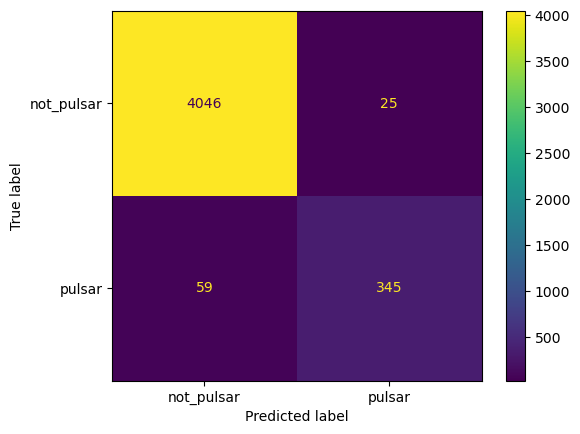

In [19]:
disp_mat = ConfusionMatrixDisplay(
    confusion_matrix=confusion_mt, display_labels=pulsar_fit_2.classes_
)
print("Figure 4: Confusion Matrix")
disp_mat.plot()

The confusion matrix shows that 4046 observations were correctly classified as non-pulsar, and 345 were correctly classified as a pulsar. We can also see that our classifier made a few mistakes, it classified 59 observations from a pulsar star as non-pulsar, and 25 observations from a non-pulsar star as a pulsar. Thus, it correctly classified 4391 observations out of 4475 observations.

<h1 style="font-size: 25px;">Discussion</h1>


In figuring out whether a signal is from a pulsar or not, we found that there were way more pulsars than non-pulsars. In the testing set, we found that 4046 signals that do not from pulsars are classified correctly, and 25 signals from non-pulsar are wrongly classified. We found that there were 345 signals from pulsars are classified correctly, and 59 signals from pulsars are wrongly classified. Before building and testing our model, we thought that skewing the integrated profile would give us effective and efficient results. We found that there were some errors according to the confusion matrix, that there were false positives and negatives. However, this does not mean it is inaccurate, this model is justifiable as even with error and has 98% accuracy, it will still help us find pulsar stars in a trustable manner.

The accuracy we got is higher than we think it should be. In the exploratory data analysis, we can see although our predictors seem to be able to work well, there are still some points that locate in a place where their neighbours are mostly from a different class than themselves. Thus, we expected to have lower accuracy than what we got.  The reason why we got such high accuracy may be because we have a class imbalance in our dataset. The pulsar is a rare type of star(Lorimer & Kramer, 2005), and in our dataset, there are 1639 observations from pulsars and 16259 observations from non-pulsar (Lyon, 2016). In our training set, there are 12188 observations from non-pulsar and 1235 observations from pulsars. The K-nearest neighbours algorithm relies on neighbours, so in this particular case, even if we classify every observation to be the majority (non-pulsar), we can get pretty high accuracy.

Overall, our model turns out to be accurate. A 98% accuracy in prediction is quite good. Besides considering accuracy, we also look at the confusion matrix. Among the mistakes our model makes, wrongly predicting a signal from a pulsar to be from a non-pulsar is the relatively common one. This can be caused by class imbalance since the classifier will be more likely to predict an observation to be in the majority class (non-pulsar). In practice, scientists are interested in finding pulsars because many useful properties they have(Robert, 2023). Thus, luckily although our model misses some true pulsars, it won't hurt so much since it's not a life or death situation, and it did predict most signals (345/(59+345)=85%) from the pulsar to be from the pulsar. Scientists can find most of the pulsars from the candidates using this model. It may cause some trouble for the model to predict a signal from a non-pulsar to be from a pulsar since scientists may spend time and money on not useful stars. However, since this type of mistake is really low for our model shown by our confusion matrix, our model is still good to use for finding pulsars. 

According to the above discussion, we think that our model can enable scientists to find the pulsar stars more efficiently and effectively, which may help investigate the probes of space-time or the state of matter (Lorimer & Kramer, 2005). The future question this project may lead to is, will adding a third predictor variable allow a more accurate prediction of the source of a signal? If so, which out of the 6 remaining variables can we use as the additional predictor variable?

<h1 style="font-size: 25px;">References</h1>

M, Barbara. Newman, Phil. (March, 2017). Neutron Stars. NASA. IMAGINE THE UNIVERSE. https://imagine.gsfc.nasa.gov

R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, K. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1091/mrnas/stw656

R. J. Lyon, HTRU2, DOI: 10.6084/m9.figshare.3080389.v1.

D. R. Lorimer and M. Kramer. (2005). 'Handbook of Pulsar Astronomy', Cambridge University Press, 2005.http://assets.cambridge.org/97805218/28239/copyright/9780521828239_copyright.pdf 

L, Robert. (Jan 24, 2023). What are pulsars?. New York. SPACE.com. https://www.space.com/32661-pulsars.html
